In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Load the TensorBoard notebook extension
%load_ext tensorboard
import datetime #for tensorboard

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

# Clear any logs from previous runs
#rm -rf /logs/fit #buggy

In [2]:
datadir = 'C:/Users/17788/Documents/code/Py/emotions-main/emotions-main/emotions.csv'
data = pd.read_csv(datadir)
#data

In [3]:
#data['label'].value_counts()
#re-map the labels onto the labels column
label_map = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].replace(label_map)

In [4]:
def preprocess_inputs(df):
    #extract the data and the labels. just the first 1000
    df1 = df.loc[0:1000, 'mean_1_a':'mean_d_4_a'].copy()
    df2 = df.loc[0:1000, 'label'].copy()
    
    y = df2
    X = df1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

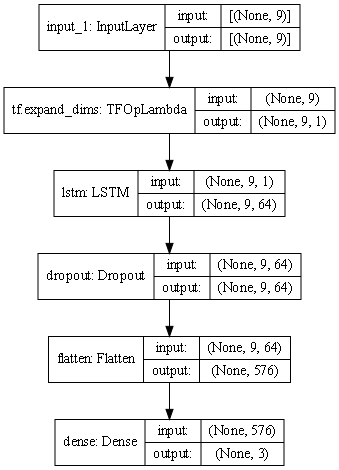

In [6]:
#start defining the model
inputs = tf.keras.Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)
LSTM = tf.keras.layers.LSTM(64, return_sequences=True)(expand_dims)
dropout = tf.keras.layers.Dropout(0.4)(LSTM)
flatten = tf.keras.layers.Flatten()(dropout)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
#print(model.summary())
tf.keras.utils.plot_model(model = model , rankdir="UD", dpi=72, show_shapes=True)

In [7]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#for tensorboard
log_dir = "logs/fit/" + "LSTM" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.4,
    batch_size=64,
    epochs=100,
    callbacks=[
        tensorboard_callback,
        #tf.keras.callbacks.LearningRateScheduler(
        #lambda epoch: 1e-3 * 10 ** (epoch / 30)
        #)
    ]
)

Epoch 1/100
7/7 [==============================] - 9s 652ms/step - loss: 1.0368 - accuracy: 0.5511 - val_loss: 0.7943 - val_accuracy: 0.6786
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 0.7702 - accuracy: 0.6707 - val_loss: 0.6589 - val_accuracy: 0.7286
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 0.6254 - accuracy: 0.7375 - val_loss: 0.5860 - val_accuracy: 0.7429
Epoch 4/100
7/7 [==============================] - 0s 23ms/step - loss: 0.5343 - accuracy: 0.7620 - val_loss: 0.5128 - val_accuracy: 0.7607
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 0.4898 - accuracy: 0.8204 - val_loss: 0.4614 - val_accuracy: 0.7857
Epoch 6/100
7/7 [==============================] - 0s 28ms/step - loss: 0.4493 - accuracy: 0.8436 - val_loss: 0.4247 - val_accuracy: 0.7929
Epoch 7/100
7/7 [==============================] - 0s 26ms/step - loss: 0.4175 - accuracy: 0.8223 - val_loss: 0.3904 - val_accuracy: 0.8250
Epoch 8/100
7/7 [==

In [8]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 93.355%
